In [117]:
datadir='/dls/i16/data/2018/mt19259-1/'
import sys
sys.path
sys.path.append('/dls_sw/apps/scisoftpy/2.7')
sys.path.append('/dls_sw/i16/software/python')
%matplotlib nbagg
from matplotlib.pyplot import *
from numpy import *
from dlstools.dataloader import vec2mat
from dlstools.quickfit import *
from dlstools.dirty_fit import fit
from dlstools import dataloader
d=dataloader.dlsloader(datadir+'%i.dat')
p=dataloader.tiffloader(d, lambda obj: datadir+obj.pilatus3_100k_path_template)
psnap=dataloader.tiffloader(datadir+'snapped-data/pilatus2M/'+'%05i.tif')
savefolder='/dls/science/users/spc93/processing/'

<IPython.core.display.Javascript object>


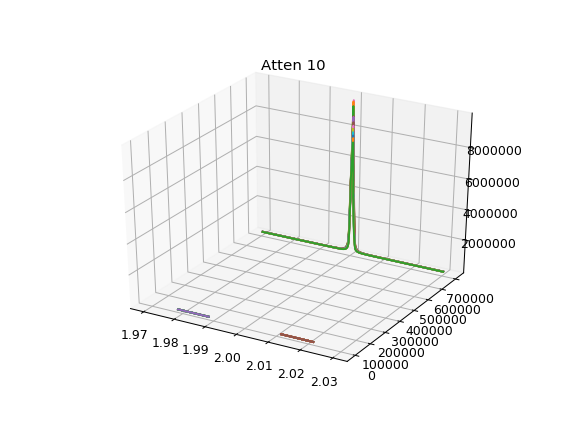

<IPython.core.display.Javascript object>


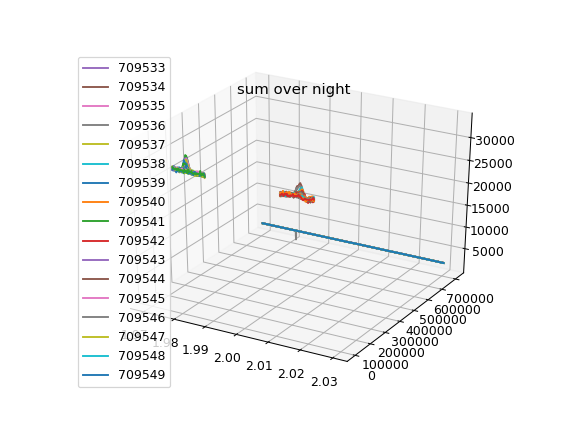

<IPython.core.display.Javascript object>


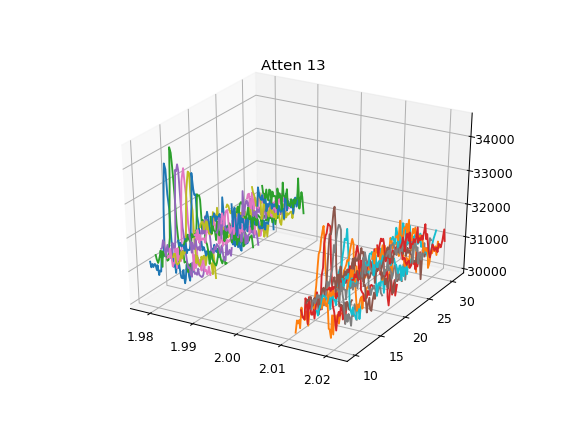

<IPython.core.display.Javascript object>


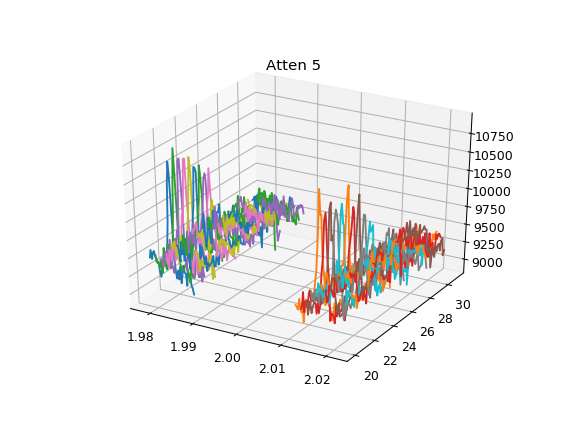

Text(0.5,0.92,u'Atten 5')

In [8]:
title_str = 'Atten 10'
scans=range(709038, 709083+1)
figure()
for scan in scans:
    d(scan)
    gca(projection='3d').plot(d.l, d.Tset, d.roi1_sum); 
title(title_str)

title_str = 'Atten 0'
scans=range(709084, 709127+1)
figure()
for scan in scans:
    d(scan)
    gca(projection='3d').plot(d.l, d.Tset, d.roi1_sum); 
title(title_str)

title_str = 'Atten 13'
figure()
for scan in scans:
    d(scan)
    gca(projection='3d').plot(d.l, d.Tset, d.roi1_sum); 
title(title_str)

title_str = 'Atten 5'
scans=range(709174, 709219+1)
figure()
for scan in scans:
    d(scan)
    gca(projection='3d').plot(d.l, d.Tset, d.roi1_sum); 
title(title_str)

<IPython.core.display.Javascript object>


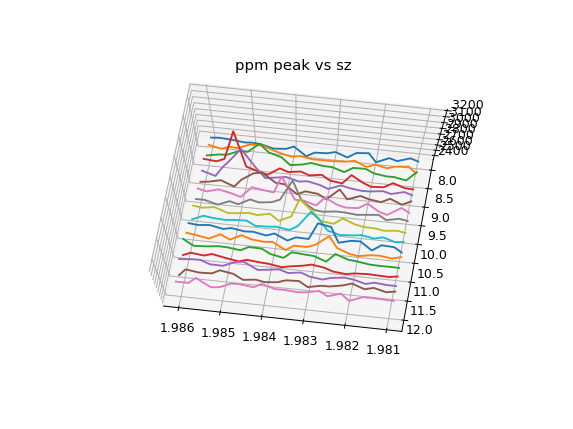

Text(0.5,0.92,u'ppm peak vs sz')

In [12]:
title_str = 'ppm peak vs sz'
scans=range(709228, 709244+1)
figure()
for scan in scans:
    d(scan)
    sz=d.l*0+d.sz
    gca(projection='3d').plot(d.l, sz, d.roi1_sum); 
title(title_str)

In [18]:
d(709254)

#709254  h k l Tset Ta Tb beamOK kphi kap kth kmu kdelta kgam delta_axis_offset TimeSec ic1monitor rc count_time path maxx maxy maxval sum roi2_maxx roi2_maxy roi2_maxval roi2_sum roi1_maxx roi1_maxy roi1_maxval roi1_sum metadata

<IPython.core.display.Javascript object>


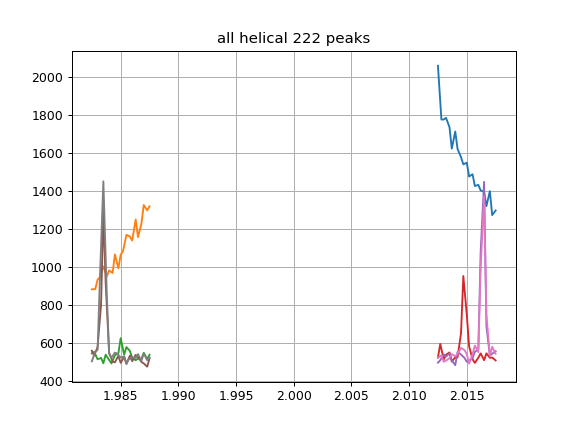

Text(0.5,1,u'all helical 222 peaks')

In [23]:
title_str = 'all helical 222 peaks'
scans=range(709269, 709276+1)
figure()
for scan in scans:
    d(scan)
    plot(d.l, d.roi1_sum); 
grid(); title(title_str)

<IPython.core.display.Javascript object>


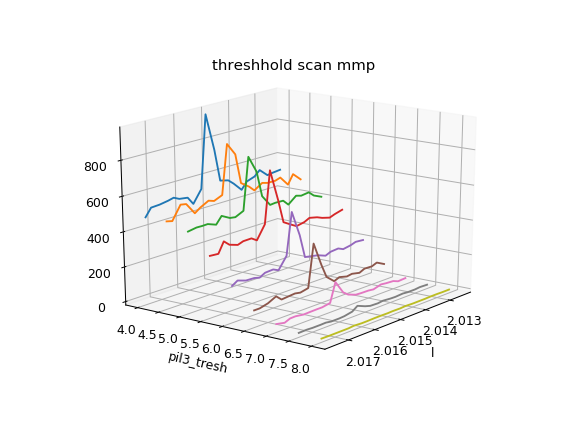

Text(0.5,0,u'pil3_tresh')

In [35]:
title_str = 'threshhold scan mmp'
scans=range(709285, 709293+1)
figure()
for scan in scans:
    d(scan)
    gca(projection='3d').plot(d.l, d.pil3_tresh, d.roi1_sum); 
grid(); title(title_str); xlabel('l'); ylabel('pil3_tresh')

<IPython.core.display.Javascript object>


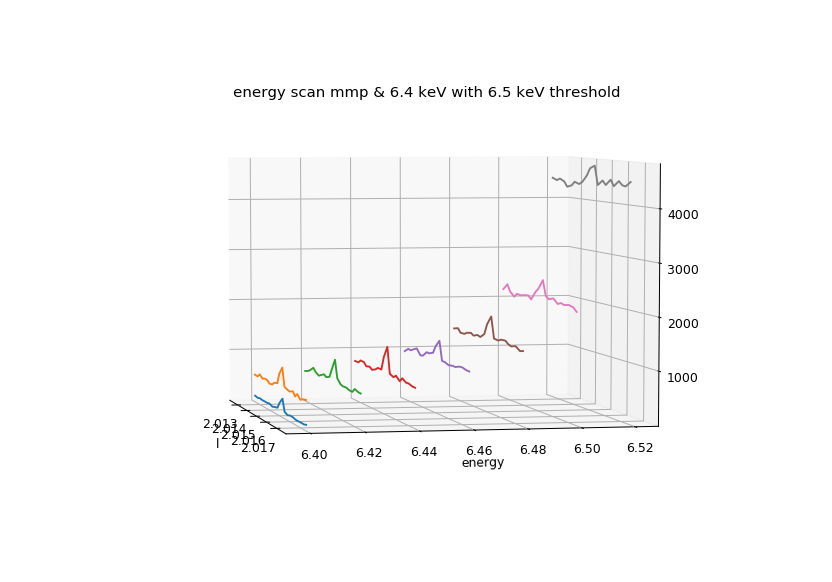

Text(0.5,0,u'energy')

In [42]:
title_str = 'energy scan mmp & 6.4 keV with 6.5 keV threshold'
scans=[709294]+range(709296, 709303)
figure()
for scan in scans:
    d(scan)
    en=d.l*0+d.en
    gca(projection='3d').plot(d.l, en, d.roi1_sum); 
grid(); title(title_str); xlabel('l'); ylabel('energy')

<IPython.core.display.Javascript object>


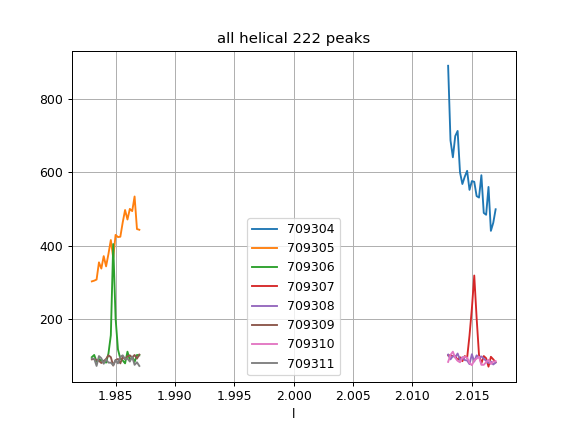

In [50]:
title_str = 'all helical 222 peaks'
scans=range(709304, 709311+1)
figure()
for scan in scans:
    d(scan)
    plot(d.l, d.roi1_sum, label=str(scan)); 
grid(); title(title_str); xlabel('l'); legend()

savefig(savefolder+title_str+'.pdf')

<IPython.core.display.Javascript object>


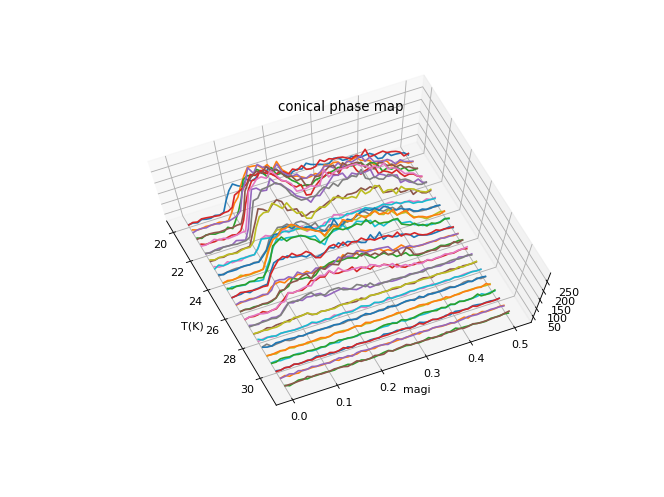

In [75]:
I_B=91.5
title_str = 'conical phase map'
scans=range(709344+1, 709413,3)
figure()
for scan in scans:
    d(scan)
    bfield=d.magi/I_B
    gca(projection='3d').plot(d.Tset, bfield, d.roi1_maxval); 
grid(); title(title_str); xlabel('T(K)'); ylabel('magi')

scans=range(709344+2, 709413,3)
for scan in scans:
    d(scan)
    bfield=d.magi/I_B
    gca(projection='3d').plot(d.Tset, bfield, d.roi1_maxval); 
grid(); title(title_str); xlabel('T(K)'); ylabel('magi')

#savefig(savefolder+title_str+'.pdf')

<IPython.core.display.Javascript object>


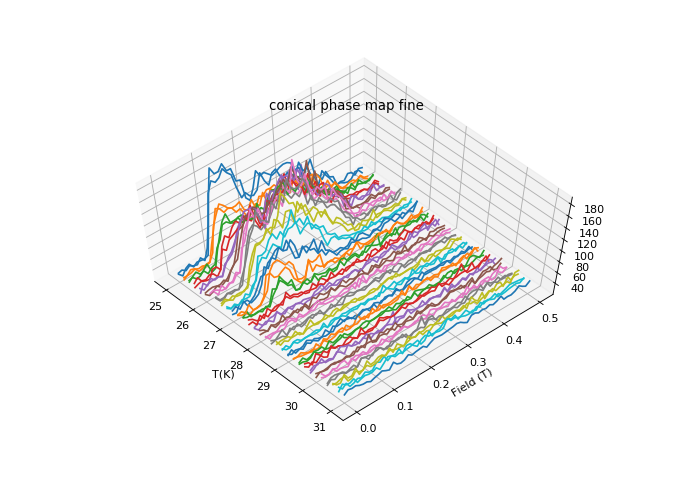

In [77]:
title_str = 'conical phase map fine'
scans=range(709413+1, 709504,3)
figure()
for scan in scans:
    d(scan)
    bfield=d.magi/I_B
    gca(projection='3d').plot(d.Tset, bfield, d.roi1_maxval); 
grid(); title(title_str); xlabel('T(K)'); ylabel('magi')

scans=range(709413+2, 709505+1,3)
for scan in scans:
    d(scan)++
    bfield=d.magi/I_B
    gca(projection='3d').plot(d.Tset, bfield, d.roi1_maxval); 
grid(); title(title_str); xlabel('T(K)'); ylabel('Field (T)')

#savefig(savefolder+title_str+'.pdf')

<IPython.core.display.Javascript object>


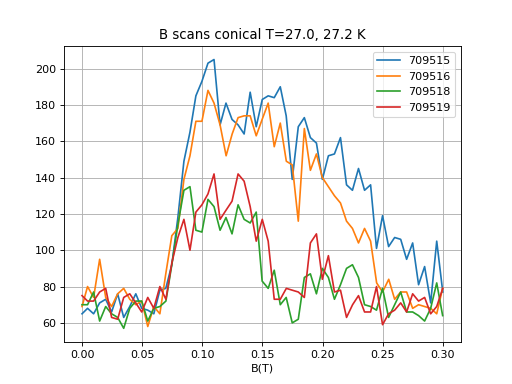

In [79]:
title_str = 'B scans conical T=27.0, 27.2 K'
scans=[709515, 709516, 709518, 709519]
figure()
for scan in scans:
    d(scan)
    plot(d.magi/I_B, d.roi1_maxval, label=str(scan)); 
grid(); title(title_str); xlabel('B(T)'); legend()

<IPython.core.display.Javascript object>


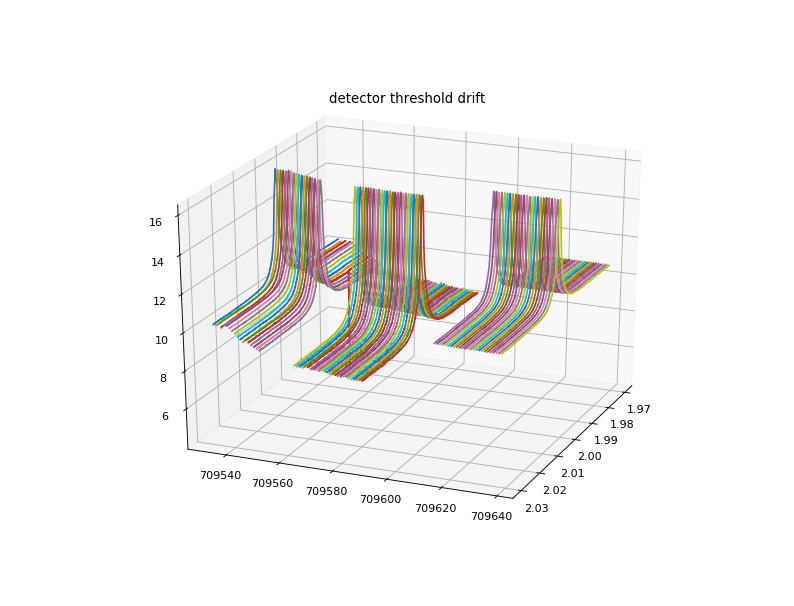

In [262]:
title_str = 'detector threshold drift'
scans=range(709533, 709551)+range(709563, 709589)+range(709614, 709638+1)
figure();
for scan in scans:
    d(scan)
    gca(projection='3d').plot(d.l, scan*ones(len(d.l)), np.log(d.sum), label=str(scan)); 
grid(); title(title_str); 
#legend()
#gca().set_zlim(8,17)

#figure();
#for scan in scans:
#    d(scan)
#    gca(projection='3d').plot(d.l, scan*ones(len(d.l)), d.ic1monitor, label=str(scan));    
#rid(); title(title_str); legend()

#for scan in scans:
#    d(scan)
#   print '#%i\tTset:%.1f\tB:%.1f' % (scan, d.Tset[0], d.)



<IPython.core.display.Javascript object>


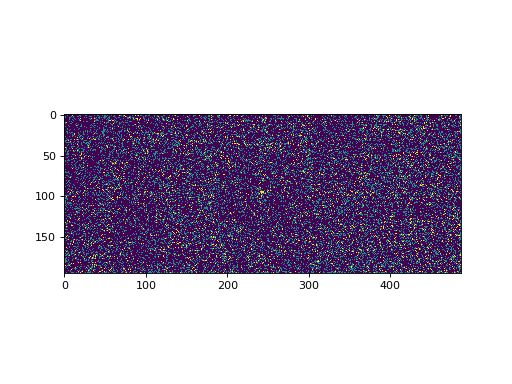

<IPython.core.display.Javascript object>


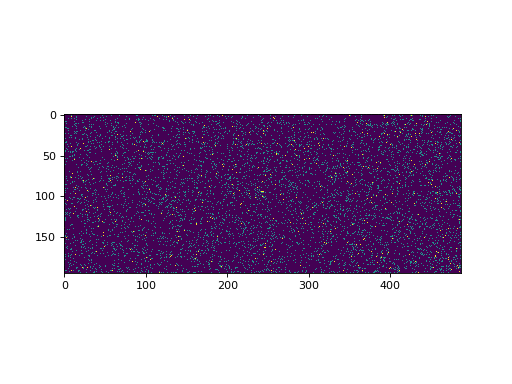

In [124]:
d(709533); p(1); figure(); imshow(p.image_01); clim([0,2])

d(709550); p(1); figure(); imshow(p.image_01); clim([0,2])

In [136]:
firstscan=709533
bdic, tdic= {}, {}
scan = firstscan
for bval in arange(0.1,0.3,0.05):
    for tval in arange(28, 25-.1, -0.5):
        print "%i:\tT=%.1f\tB=%.2f T" % (scan, tval, bval)
        bdic[scan], tdic[scan] = bval, tval 
        scan += 1
        


709533:	T=28.0	B=0.10 T
709534:	T=27.5	B=0.10 T
709535:	T=27.0	B=0.10 T
709536:	T=26.5	B=0.10 T
709537:	T=26.0	B=0.10 T
709538:	T=25.5	B=0.10 T
709539:	T=25.0	B=0.10 T
709540:	T=28.0	B=0.15 T
709541:	T=27.5	B=0.15 T
709542:	T=27.0	B=0.15 T
709543:	T=26.5	B=0.15 T
709544:	T=26.0	B=0.15 T
709545:	T=25.5	B=0.15 T
709546:	T=25.0	B=0.15 T
709547:	T=28.0	B=0.20 T
709548:	T=27.5	B=0.20 T
709549:	T=27.0	B=0.20 T
709550:	T=26.5	B=0.20 T
709551:	T=26.0	B=0.20 T
709552:	T=25.5	B=0.20 T
709553:	T=25.0	B=0.20 T
709554:	T=28.0	B=0.25 T
709555:	T=27.5	B=0.25 T
709556:	T=27.0	B=0.25 T
709557:	T=26.5	B=0.25 T
709558:	T=26.0	B=0.25 T
709559:	T=25.5	B=0.25 T
709560:	T=25.0	B=0.25 T


<IPython.core.display.Javascript object>


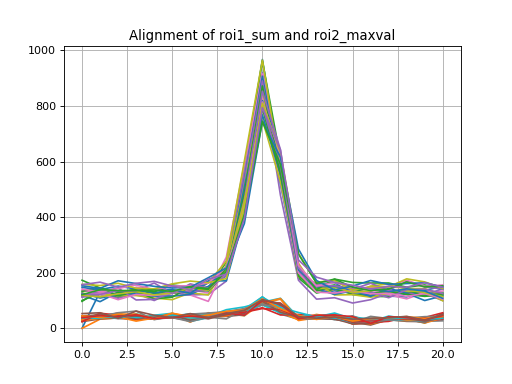

<IPython.core.display.Javascript object>


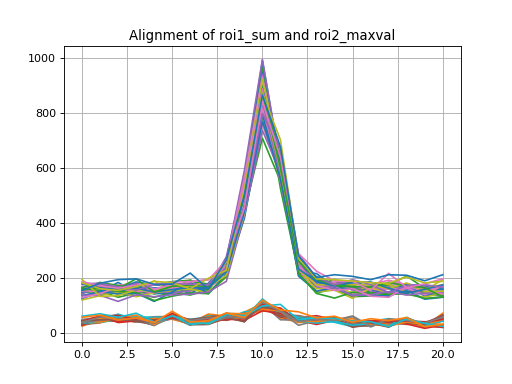

In [152]:
title_str = 'Alignment of roi1_sum and roi2_maxval'

figure(); 
for scan in range(709344, 709413,3):
    d(scan)
    plot(d.roi1_sum)
    plot(d.roi2_maxval)
grid(); title(title_str); 

figure();
for scan in range(709413, 709505+1,3):
    d(scan)
    plot(d.roi1_sum)
    plot(d.roi2_maxval)
grid(); title(title_str); 
    
    
    
    

<IPython.core.display.Javascript object>


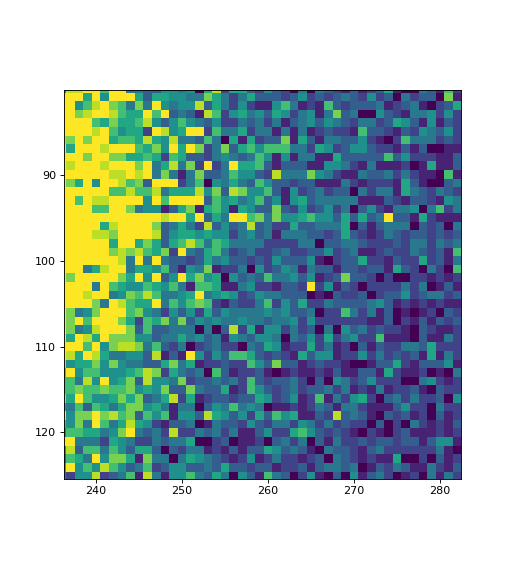

In [157]:
d(709345); p(25); figure(); imshow(p.image_01); clim([0,10])

In [158]:
p.image_01.shape

(195, 487)

<IPython.core.display.Javascript object>


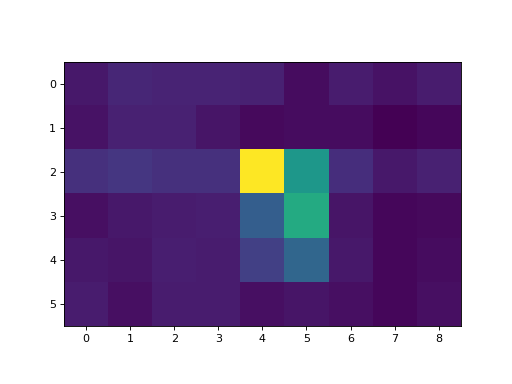

In [165]:
roi=p.image_01[93:99, 241:250]
figure(); imshow(roi)

In [218]:
def pk_in_array(data_array, npix=1, roi=None):
    #roi: [imin, jmax, imin, imax]
    if roi==None:
        dat=data_array
    else:
        dat=data_array[roi[0]:roi[1], roi[2]:roi[3]]

    ss=sort(dat.flatten())
    ll=len(ss)
   
    pksum=sum(ss[-npix::]) #largest npix values
    bgsum=sum(ss[0:ll-N])
    meanbg=bgsum*1./(ll-npix)
    pk_minus_bg=pksum-npix*meanbg
    
    return pk_minus_bg
   
def pk_in_array_in_scan(scan, npix=1, roi=None):
    d(scan)
    pk_array=d.path*0
    for imnum in d.path:
        p(imnum)
        pk_array[imnum-1]=pk_in_array(p.image_01, npix, roi)
    return pk_array

        
#pk_in_array(p.image_01, npix=8, roi=[93, 99, 241, 250])
#aa=pk_in_array_in_scan(709344, npix=8, roi=[93, 99, 241, 250])



<IPython.core.display.Javascript object>


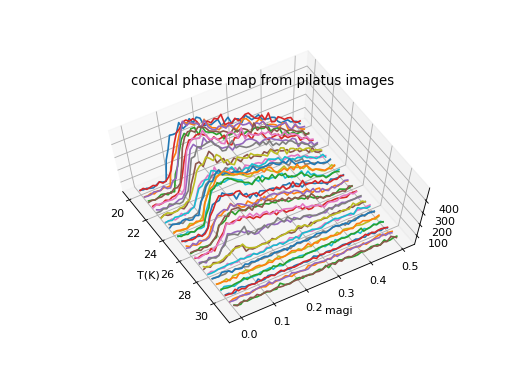

In [227]:
I_B=91.5
title_str = 'conical phase map from pilatus images'
scans=range(709344+1, 709413,3)
figure()
for scan in scans:
    d(scan)
    bfield=d.magi/I_B
    pix_peak=pk_in_array_in_scan(scan, npix=8, roi=[93, 99, 241, 250])
    gca(projection='3d').plot(d.Tset, bfield, pix_peak); 
grid(); title(title_str); xlabel('T(K)'); ylabel('magi')

scans=range(709344+2, 709413,3)
for scan in scans:
    d(scan)
    bfield=d.magi/I_B
    pix_peak=pk_in_array_in_scan(scan, npix=8, roi=[93, 99, 241, 250])
    gca(projection='3d').plot(d.Tset, bfield, pix_peak); 
grid(); title(title_str); xlabel('T(K)'); ylabel('magi')

savefig(savefolder+title_str+'.pdf')

In [228]:
savefig(savefolder+title_str+'.pdf')

<IPython.core.display.Javascript object>


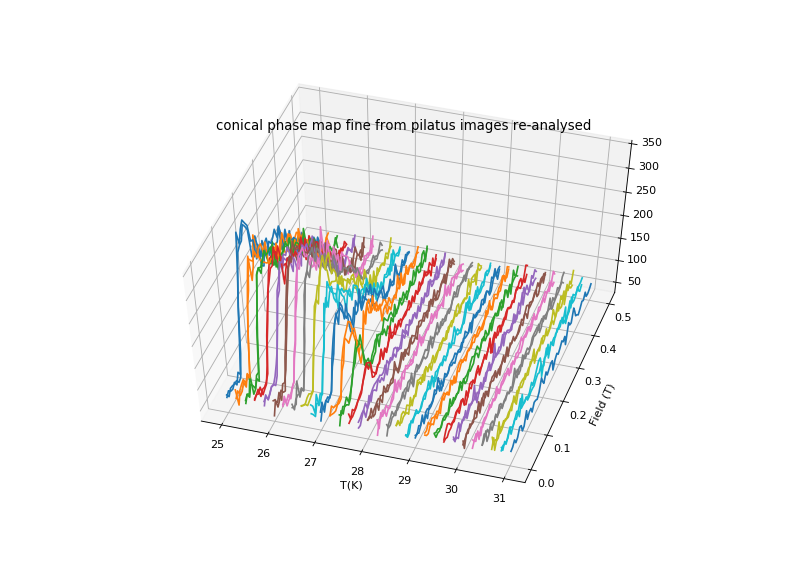

In [263]:
title_str = 'conical phase map fine from pilatus images re-analysed'
scans=range(709413+1, 709504,3)
figure()
for scan in scans:
    d(scan)
    bfield=d.magi/I_B
    pix_peak=pk_in_array_in_scan(scan, npix=8, roi=[93, 99, 241, 250])
    gca(projection='3d').plot(d.Tset, bfield, pix_peak); 
grid(); title(title_str); xlabel('T(K)'); ylabel('magi')

scans=range(709413+2, 709505+1,3)
for scan in scans:
    d(scan)
    bfield=d.magi/I_B
    pix_peak=pk_in_array_in_scan(scan, npix=8, roi=[93, 99, 241, 250])
    gca(projection='3d').plot(d.Tset, bfield, pix_peak); 
grid(); title(title_str); xlabel('T(K)'); ylabel('Field (T)')

savefig(savefolder+title_str+'.pdf')

<IPython.core.display.Javascript object>


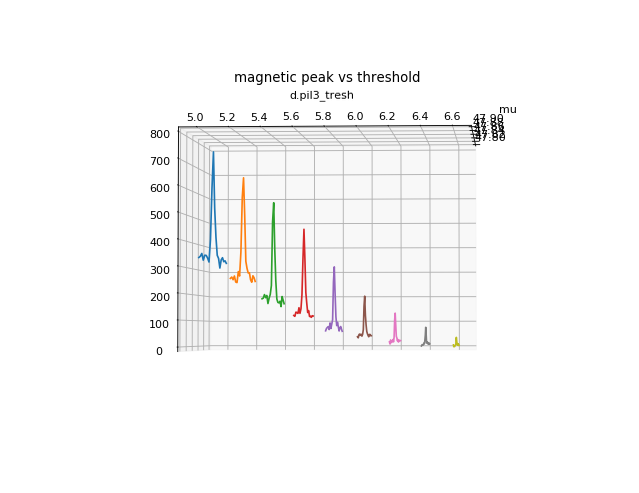

Text(0.5,0,u'd.pil3_tresh')

In [254]:
title_str = 'magnetic peak vs threshold'
scans=range(709604, 709612+1)
figure()
for scan in scans:
    d(scan)
    gca(projection='3d').plot(d.mu, d.pil3_tresh, d.roi1_sum); 
gca().set_zlim(0,800)
grid(); title(title_str); xlabel('mu'); ylabel('d.pil3_tresh')

In [255]:
savefig(savefolder+title_str+'.pdf')

In [265]:
d(709645); d.Tset

array([ 25.,  25.,  25., ...,  25.,  25.,  25.])